In [177]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor, RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

In [2]:
df = pd.read_csv('./data/InsNova_data_2023_train.csv')
df.reset_index(drop=True, inplace=True)

df.head()

,id,veh_value,exposure,veh_body,veh_age,gender,area,agecat,engine_type,max_power,...,marital_status,e_bill,time_of_week_driven,time_driven,trm_len,credit_score,high_education_ind,clm,numclaims,claimcst0
0,1,0.77,0.444504,SEDAN,4,M,D,3,petrol,147,...,S,1,weekday,6pm - 12am,6,640.448137,1.0,0,0,0.0
1,2,4.45,0.562183,STNWG,1,M,A,3,petrol,158,...,S,1,weekday,6am - 12pm,12,683.749691,0.0,0,0,0.0
2,3,4.90,0.465244,STNWG,1,F,A,3,petrol,159,...,M,1,weekday,6pm - 12am,6,653.656117,1.0,0,0,0.0
3,4,0.48,0.271039,PANVN,4,M,A,4,petrol,80,...,S,1,weekday,12pm - 6pm,12,642.574671,0.0,0,0,0.0
4,5,0.85,0.141624,SEDAN,4,F,A,5,petrol,126,...,S,0,weekday,6am - 12pm,6,647.175035,0.0,0,0,0.0


In [3]:
df.shape

(22619, 22)

In [4]:
df.isnull().sum()

id                       0
veh_value                0
exposure                 0
veh_body                 0
veh_age                  0
gender                   0
area                     0
agecat                   0
engine_type              0
max_power                0
driving_history_score    0
veh_color                0
marital_status           0
e_bill                   0
time_of_week_driven      0
time_driven              0
trm_len                  0
credit_score             0
high_education_ind       0
clm                      0
numclaims                0
claimcst0                0
dtype: int64

In [5]:
df.columns

Index(['id', 'veh_value', 'exposure', 'veh_body', 'veh_age', 'gender', 'area',
       'agecat', 'engine_type', 'max_power', 'driving_history_score',
       'veh_color', 'marital_status', 'e_bill', 'time_of_week_driven',
       'time_driven', 'trm_len', 'credit_score', 'high_education_ind', 'clm',
       'numclaims', 'claimcst0'],
      dtype='object')

In [6]:
df.drop(['id'], axis=1, inplace=True)
df.head()

,veh_value,exposure,veh_body,veh_age,gender,area,agecat,engine_type,max_power,driving_history_score,...,marital_status,e_bill,time_of_week_driven,time_driven,trm_len,credit_score,high_education_ind,clm,numclaims,claimcst0
0,0.77,0.444504,SEDAN,4,M,D,3,petrol,147,67.0,...,S,1,weekday,6pm - 12am,6,640.448137,1.0,0,0,0.0
1,4.45,0.562183,STNWG,1,M,A,3,petrol,158,76.0,...,S,1,weekday,6am - 12pm,12,683.749691,0.0,0,0,0.0
2,4.90,0.465244,STNWG,1,F,A,3,petrol,159,58.0,...,M,1,weekday,6pm - 12am,6,653.656117,1.0,0,0,0.0
3,0.48,0.271039,PANVN,4,M,A,4,petrol,80,72.0,...,S,1,weekday,12pm - 6pm,12,642.574671,0.0,0,0,0.0
4,0.85,0.141624,SEDAN,4,F,A,5,petrol,126,91.0,...,S,0,weekday,6am - 12pm,6,647.175035,0.0,0,0,0.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22619 entries, 0 to 22618
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   veh_value              22619 non-null  float64
 1   exposure               22619 non-null  float64
 2   veh_body               22619 non-null  object 
 3   veh_age                22619 non-null  int64  
 4   gender                 22619 non-null  object 
 5   area                   22619 non-null  object 
 6   agecat                 22619 non-null  int64  
 7   engine_type            22619 non-null  object 
 8   max_power              22619 non-null  int64  
 9   driving_history_score  22619 non-null  float64
 10  veh_color              22619 non-null  object 
 11  marital_status         22619 non-null  object 
 12  e_bill                 22619 non-null  int64  
 13  time_of_week_driven    22619 non-null  object 
 14  time_driven            22619 non-null  object 
 15  tr

In [14]:
df['veh_value'].describe()

count    22619.000000
mean         1.868948
std          1.278588
min          0.000000
25%          1.070000
50%          1.570000
75%          2.260000
max         24.510000
Name: veh_value, dtype: float64

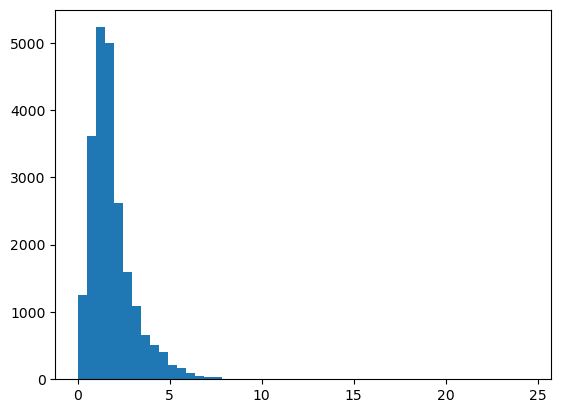

In [27]:
plt.hist(df['veh_value'], bins=50)
plt.show()

In [20]:
df['exposure'].describe()

count    22619.000000
mean         0.433038
std          0.272899
min          0.001754
25%          0.203696
50%          0.384313
75%          0.643316
max          0.999378
Name: exposure, dtype: float64

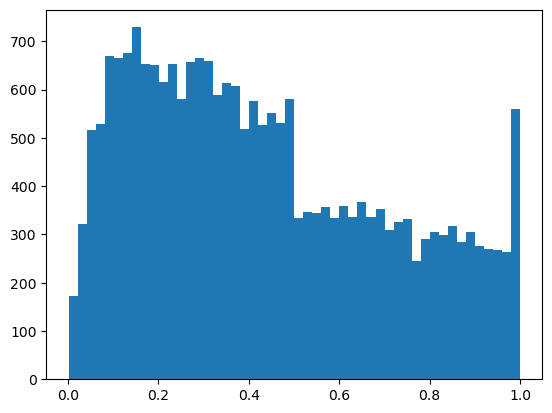

In [28]:
plt.hist(df['exposure'], bins=50)
plt.show()

In [29]:
df['veh_body'].value_counts()

SEDAN    7376
HBACK    6305
STNWG    5436
UTE      1530
TRUCK     586
HDTOP     510
COUPE     279
MIBUS     253
PANVN     248
MCARA      40
CONVT      28
BUS        19
RDSTR       9
Name: veh_body, dtype: int64

In [11]:
veh_bodies, counts = [], []
value_counts = df['veh_body'].value_counts()

for body in value_counts.keys():
    veh_bodies.append(body)
    counts.append(value_counts[body])

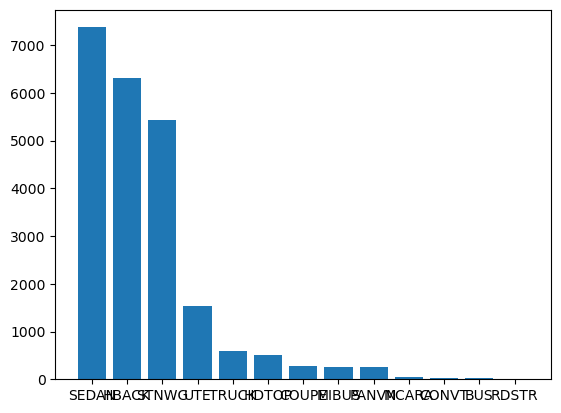

In [12]:
plt.bar(veh_bodies, counts)
plt.show()

In [8]:
df['veh_age'].value_counts()

3    6694
4    6285
2    5474
1    4166
Name: veh_age, dtype: int64

In [15]:
veh_ages, counts = [], []
value_counts = df['veh_age'].value_counts()

for body in value_counts.keys():
    veh_ages.append(body)
    counts.append(value_counts[body])

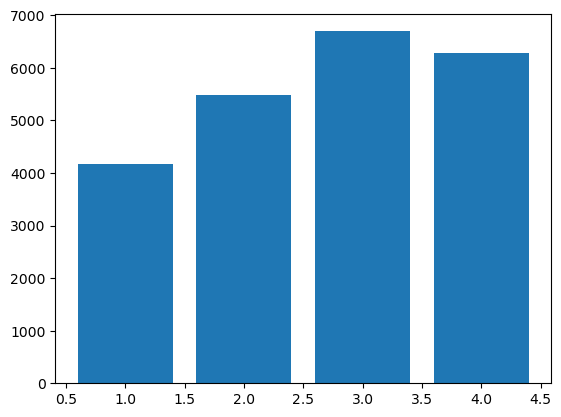

In [16]:
plt.bar(veh_ages, counts)
plt.show()

In [17]:
df['gender'].value_counts()

F    12853
M     9766
Name: gender, dtype: int64

In [18]:
df['area'].value_counts()

C    6944
A    5450
B    4466
D    2620
E    1951
F    1188
Name: area, dtype: int64

In [19]:
df['agecat'].value_counts()

4    5383
3    5304
2    4360
5    3544
6    2168
1    1860
Name: agecat, dtype: int64

In [20]:
df['engine_type'].value_counts()

petrol      14146
dissel       4603
hybrid       2107
electric     1763
Name: engine_type, dtype: int64

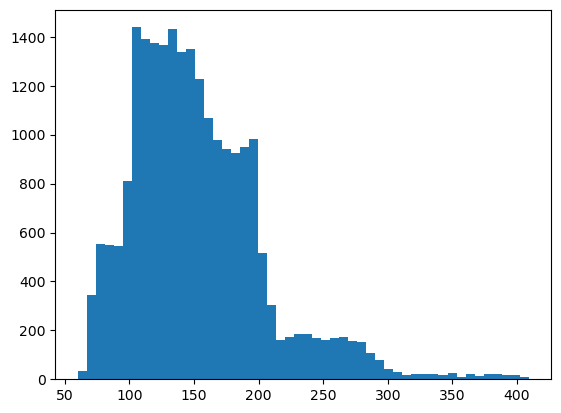

In [22]:
plt.hist(df['max_power'], bins=50)
plt.show()

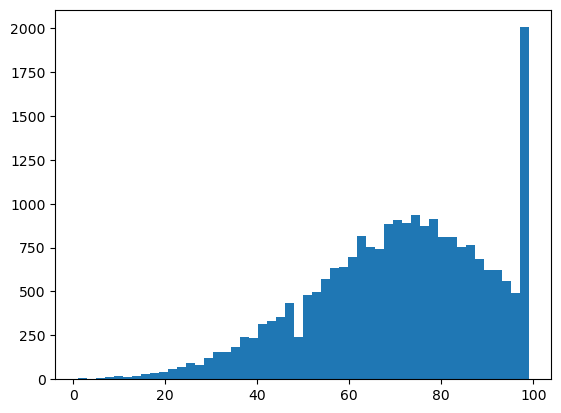

In [27]:
plt.hist(df['driving_history_score'], bins=50)
plt.show()

In [28]:
df['veh_color'].value_counts()

white     4873
gray      4766
black     4359
blue      2002
silver    1818
red       1360
green     1316
brown     1142
yellow     983
Name: veh_color, dtype: int64

In [29]:
df['marital_status'].value_counts()

M    12401
S    10218
Name: marital_status, dtype: int64

In [30]:
df['e_bill'].value_counts()

1    14404
0     8215
Name: e_bill, dtype: int64

In [31]:
df['time_of_week_driven'].value_counts()

weekday    18105
weekend     4514
Name: time_of_week_driven, dtype: int64

In [32]:
df['time_driven'].value_counts()

12pm - 6pm     9102
6am - 12pm     9000
6pm - 12am     3385
12am - 6 am    1132
Name: time_driven, dtype: int64

In [33]:
df['trm_len'].value_counts()

12    16941
6      5678
Name: trm_len, dtype: int64

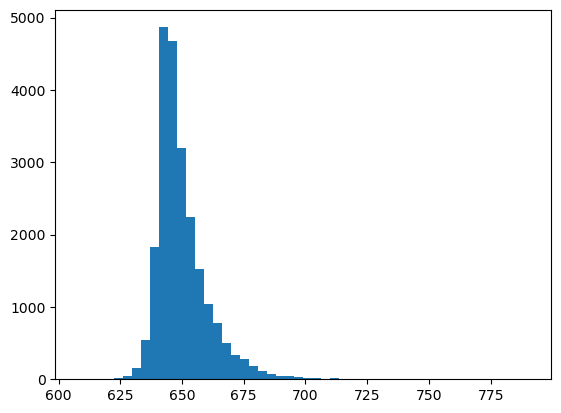

In [34]:
plt.hist(df['credit_score'], bins=50)
plt.show()

In [35]:
df['high_education_ind'].value_counts()

0.0    19970
1.0     2649
Name: high_education_ind, dtype: int64

In [36]:
df['clm'].value_counts()

0    21077
1     1542
Name: clm, dtype: int64

In [37]:
df['numclaims'].value_counts()

0    21077
1     1439
2       94
3        9
Name: numclaims, dtype: int64

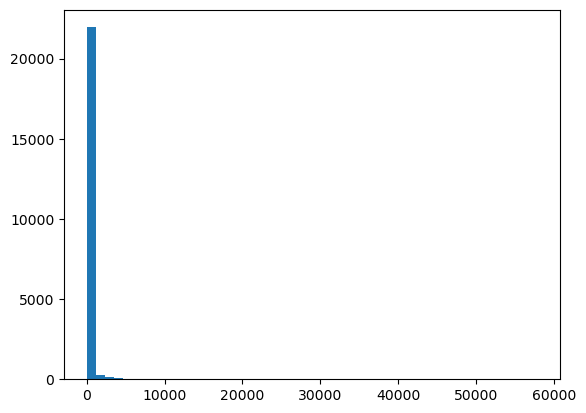

In [162]:
plt.hist(df['claimcst0'], bins=50)
plt.show()

In [49]:
df.corr()

,veh_value,exposure,veh_age,agecat,max_power,driving_history_score,e_bill,trm_len,credit_score,high_education_ind,clm,numclaims,claimcst0
veh_value,1.000000,-0.000279,-0.539635,-0.066263,0.190229,0.010630,0.126045,-0.000240,-0.002800,-0.008438,0.005282,0.002191,0.002859
exposure,-0.000279,1.000000,0.038373,0.027080,-0.001208,-0.005429,-0.000743,0.402730,-0.081266,0.527214,0.116118,0.117565,0.039957
veh_age,-0.539635,0.038373,1.000000,0.028051,0.059412,-0.004086,-0.162433,0.016479,0.001467,0.030029,0.001758,0.004123,0.007544
agecat,-0.066263,0.027080,0.028051,1.000000,-0.049019,0.000759,-0.017738,-0.000865,0.000132,0.021883,-0.030845,-0.029969,-0.021520
max_power,0.190229,-0.001208,0.059412,-0.049019,1.000000,0.002779,0.004979,0.001494,0.002260,0.002135,-0.003863,0.000056,0.008413
driving_history_score,0.010630,-0.005429,-0.004086,0.000759,0.002779,1.000000,-0.004984,-0.001114,-0.003909,-0.003035,0.008172,0.008004,0.012507
e_bill,0.126045,-0.000743,-0.162433,-0.017738,0.004979,-0.004984,1.000000,-0.012550,0.017685,-0.006264,0.002568,0.000235,-0.001108
trm_len,-0.000240,0.402730,0.016479,-0.000865,0.001494,-0.001114,-0.012550,1.000000,-0.007846,0.005382,-0.007247,-0.006479,-0.000671
credit_score,-0.002800,-0.081266,0.001467,0.000132,0.002260,-0.003909,0.017685,-0.007846,1.000000,-0.046448,-0.013757,-0.013117,-0.006191
high_education_ind,-0.008438,0.527214,0.030029,0.021883,0.002135,-0.003035,-0.006264,0.005382,-0.046448,1.000000,0.080958,0.082107,0.024714


In [50]:
# MAIN MODEL METRIC (between -1 and 1, 1 is perfect, 0 is like random guessing): 
def calculate_normalized_gini_regression(true_values, predicted_values):
    combined_data = list(zip(true_values, predicted_values))
    combined_data.sort(key=lambda x: x[1])
    
    n = len(combined_data)
    
    cumulative_true = [0]
    cumulative_pred = [0]

    for i in range(n):
        cumulative_true.append(cumulative_true[i] + combined_data[i][0])
        cumulative_pred.append(cumulative_pred[i] + combined_data[i][1])
    
    total_area_perfect_equality = cumulative_true[-1] * cumulative_pred[-1]
    auc = (total_area_perfect_equality - 0.5 * (cumulative_true[n] * cumulative_pred[n])) / total_area_perfect_equality
    
    return auc

In [260]:
df_dummies = pd.get_dummies(df, columns=['veh_body', 'veh_age', 'gender', 'area', 'agecat', 'engine_type', 'veh_color', 'marital_status', 'e_bill', 'time_of_week_driven', 'time_driven', 'trm_len', 'high_education_ind'])

##### clm model

In [124]:
clm_df = df_dummies.drop(columns=['numclaims', 'claimcst0'])

clm_df['clm'].value_counts()

0    21077
1     1542
Name: clm, dtype: int64

In [125]:
majority_class = clm_df[clm_df['clm'] == 0]
minority_class = clm_df[clm_df['clm'] == 1]

print(majority_class.shape)
print(minority_class.shape)

(21077, 64)
(1542, 64)


In [126]:
oversampled_minority = resample(minority_class, replace=True, n_samples=len(majority_class))

oversampled_minority.shape

(21077, 64)

In [127]:
clm_balanced_df = pd.concat([majority_class, oversampled_minority])
clm_balanced_df = clm_balanced_df.sample(frac=1)
clm_balanced_df.reset_index(drop=True, inplace=True)

clm_balanced_df.head()

,veh_value,exposure,max_power,driving_history_score,credit_score,clm,veh_body_BUS,veh_body_CONVT,veh_body_COUPE,veh_body_HBACK,...,time_of_week_driven_weekday,time_of_week_driven_weekend,time_driven_12am - 6 am,time_driven_12pm - 6pm,time_driven_6am - 12pm,time_driven_6pm - 12am,trm_len_6,trm_len_12,high_education_ind_0.0,high_education_ind_1.0
0,0.63,0.207614,103,34.0,644.582154,0,0,0,0,0,...,1,0,0,0,1,0,0,1,1,0
1,0.80,0.354565,93,62.0,665.595502,0,0,0,0,1,...,0,1,0,0,1,0,0,1,1,0
2,2.78,0.497129,179,11.0,652.019747,1,0,0,0,0,...,1,0,0,0,1,0,1,0,0,1
3,0.64,0.426444,137,48.0,644.918141,1,0,0,0,0,...,1,0,0,1,0,0,0,1,1,0
4,1.67,0.826946,145,98.0,683.034365,0,0,0,0,0,...,1,0,0,0,1,0,0,1,1,0


In [128]:
clm_x, clm_y = clm_balanced_df.drop(columns=['clm']), clm_balanced_df['clm']

print(clm_x.shape)
print(clm_y.shape)

(42154, 63)
(42154,)


In [129]:
clm_x_train, clm_x_test, clm_y_train, clm_y_test = train_test_split(clm_x, clm_y, test_size=1 / 3)

print(clm_x_train.shape, clm_x_test.shape, clm_y_train.shape, clm_y_test.shape)

(28102, 63) (14052, 63) (28102,) (14052,)


In [ ]:
original_clm_x, original_clm_y = clm_df.drop(columns=['clm']), clm_df['clm']

In [130]:
all_combos = []

for n_estimators in [5, 10, 15, 20, 25, 50, 100, 200, 300]:
    for min_samples_leaf in [5, 10, 15, 20, 25, 50]:
        for max_depth in [3, 4, 5, 6, 7, 8, 9, 10, 15, 20]:
            for min_samples_split in [2, 3, 4, 5, 10, 15]:
                for criterion in ['gini', 'entropy', 'log_loss']:
                    all_combos.append((n_estimators, min_samples_leaf, max_depth, min_samples_split, criterion))

percentage_to_try = 0.05
n_runs = int(percentage_to_try * len(all_combos))
combos_to_try = random.sample(all_combos, n_runs)
print(f'Num runs: {n_runs}')

best_test_accuracy, clm_rf_model = -np.inf, None

for n_estimators, min_samples_leaf, max_depth, min_samples_split, criterion in combos_to_try:
    curr_model = RandomForestClassifier(n_estimators=n_estimators, min_samples_leaf=min_samples_leaf, max_depth=max_depth, min_samples_split=min_samples_split, criterion=criterion)
    curr_model.fit(clm_x_train, clm_y_train)

    clm_y_train_pred = curr_model.predict(clm_x_train)
    clm_y_test_pred = curr_model.predict(clm_x_test)

    train_accuracy = accuracy_score(clm_y_train, clm_y_train_pred)
    test_accuracy = accuracy_score(clm_y_test, clm_y_test_pred)

    if test_accuracy > best_test_accuracy:
        best_test_accuracy, clm_rf_model = test_accuracy, curr_model
        print(f'Best results so far: train = {train_accuracy}, test = {test_accuracy}')

        # Early stopping
        if best_test_accuracy >= 0.99:
            break

    n_runs -= 1
    print(f'Remaining runs: {n_runs}')

print(best_test_accuracy)
print(clm_rf_model.get_params())

Num runs: 486
Best results so far: train = 0.6355419543093018, test = 0.6299459151722174
Remaining runs: 485
Best results so far: train = 0.8161340829834175, test = 0.775690293196698
Remaining runs: 484
Remaining runs: 483
Remaining runs: 482
Remaining runs: 481
Remaining runs: 480
Remaining runs: 479
Remaining runs: 478
Remaining runs: 477
Remaining runs: 476
Remaining runs: 475
Remaining runs: 474
Remaining runs: 473
Remaining runs: 472
Remaining runs: 471
Remaining runs: 470
Remaining runs: 469
Remaining runs: 468
Remaining runs: 467
Remaining runs: 466
Remaining runs: 465
Remaining runs: 464
Best results so far: train = 0.8964842359974379, test = 0.8577426700825506
Remaining runs: 463
Remaining runs: 462
Remaining runs: 461
Remaining runs: 460
Best results so far: train = 0.9730980001423386, test = 0.9358098491317962
Remaining runs: 459
Remaining runs: 458
Remaining runs: 457
Remaining runs: 456
Remaining runs: 455
Remaining runs: 454
Remaining runs: 453
Remaining runs: 452
Remaini

In [131]:
original_clm_rf_pred = clm_rf_model.predict(original_clm_x)

print(accuracy_score(original_clm_y, original_clm_rf_pred))
print(np.unique(original_clm_rf_pred, return_counts=True))
print(original_clm_y.value_counts())

0.9864273398470312
(array([0, 1]), array([20792,  1827]))
0    21077
1     1542
Name: clm, dtype: int64


In [132]:
all_combos = []

for n_estimators in [5, 10, 15, 20, 25, 50, 100, 200, 300]:
    for min_samples_leaf in [5, 10, 15, 20, 25, 50]:
        for max_depth in [3, 4, 5, 6, 7, 8, 9, 10, 15, 20]:
            for min_samples_split in [2, 3, 4, 5, 10, 15]:
                for learning_rate in [0.01, 0.1, 0.2]:
                    all_combos.append((n_estimators, min_samples_leaf, max_depth, min_samples_split, learning_rate))

percentage_to_try = 0.01
n_runs = int(percentage_to_try * len(all_combos))
combos_to_try = random.sample(all_combos, n_runs)
print(f'Num runs: {n_runs}')

best_test_accuracy, clm_gb_model = -np.inf, None

for n_estimators, min_samples_leaf, max_depth, min_samples_split, learning_rate in combos_to_try:
    curr_model = GradientBoostingClassifier(n_estimators=n_estimators, min_samples_leaf=min_samples_leaf, max_depth=max_depth, min_samples_split=min_samples_split, learning_rate=learning_rate)
    curr_model.fit(clm_x_train, clm_y_train)

    clm_y_train_pred = curr_model.predict(clm_x_train)
    clm_y_test_pred = curr_model.predict(clm_x_test)

    train_accuracy = accuracy_score(clm_y_train, clm_y_train_pred)
    test_accuracy = accuracy_score(clm_y_test, clm_y_test_pred)

    if test_accuracy > best_test_accuracy:
        best_test_accuracy, clm_gb_model = test_accuracy, curr_model
        print(f'Best results so far: train = {train_accuracy}, test = {test_accuracy}')

        # Early stopping
        if best_test_accuracy >= 0.99:
            break

    n_runs -= 1
    print(f'Remaining runs: {n_runs}')

print(best_test_accuracy)
print(clm_gb_model.get_params())

Num runs: 97
Best results so far: train = 1.0, test = 0.9982920580700256
0.9982920580700256
{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.2, 'loss': 'log_loss', 'max_depth': 15, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 5, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [133]:
original_clm_gb_pred = clm_gb_model.predict(original_clm_x)

print(accuracy_score(original_clm_y, original_clm_gb_pred))
print(np.unique(original_clm_gb_pred, return_counts=True))
print(original_clm_y.value_counts())

0.9989389451346213
(array([0, 1]), array([21053,  1566]))
0    21077
1     1542
Name: clm, dtype: int64


In [134]:
# The gradient boosting model seems to be better for claim predictions
clm_model, clm_pred = clm_gb_model, original_clm_gb_pred
clm_pred.shape

(22619,)

##### numclaims model

In [222]:
num_claims_df = df_dummies.drop(columns=['clm', 'claimcst0'])

num_claims_df['numclaims'].value_counts()

0    21077
1     1439
2       94
3        9
Name: numclaims, dtype: int64

In [223]:
# Learn on the impure claim predictions
num_claims_df['clm'] = clm_pred

In [225]:
majority_class = num_claims_df[num_claims_df['numclaims'] == 0]
minority_class_1 = num_claims_df[num_claims_df['numclaims'] == 1]
minority_class_2 = num_claims_df[num_claims_df['numclaims'] == 2]
minority_class_3 = num_claims_df[num_claims_df['numclaims'] == 3]

print(majority_class.shape)
print(minority_class_1.shape)
print(minority_class_2.shape)
print(minority_class_3.shape)

(21077, 65)
(1439, 65)
(94, 65)
(9, 65)


In [226]:
oversampled_minority_1 = resample(minority_class_1, replace=True, n_samples=len(majority_class))
oversampled_minority_2 = resample(minority_class_2, replace=True, n_samples=len(majority_class))
oversampled_minority_3 = resample(minority_class_3, replace=True, n_samples=len(majority_class))

print(oversampled_minority_1.shape)
print(oversampled_minority_2.shape)
print(oversampled_minority_3.shape)

(21077, 65)
(21077, 65)
(21077, 65)


In [227]:
num_claims_balanced_df = pd.concat([majority_class, oversampled_minority_1, oversampled_minority_2, oversampled_minority_3])
num_claims_balanced_df = num_claims_balanced_df.sample(frac=1)
num_claims_balanced_df.reset_index(drop=True, inplace=True)

num_claims_balanced_df.head()

,veh_value,exposure,max_power,driving_history_score,credit_score,numclaims,veh_body_BUS,veh_body_CONVT,veh_body_COUPE,veh_body_HBACK,...,time_of_week_driven_weekend,time_driven_12am - 6 am,time_driven_12pm - 6pm,time_driven_6am - 12pm,time_driven_6pm - 12am,trm_len_6,trm_len_12,high_education_ind_0.0,high_education_ind_1.0,clm
0,2.10,0.731400,180,86.0,660.912631,1,0,0,0,0,...,0,0,0,1,0,0,1,1,0,1
1,1.69,0.431917,136,50.0,663.181918,1,0,0,0,1,...,0,0,0,0,1,1,0,1,0,1
2,1.60,0.123829,371,72.0,645.386202,0,0,0,0,0,...,1,0,0,1,0,1,0,1,0,0
3,0.40,0.829242,140,76.0,661.190222,2,0,0,0,0,...,0,0,1,0,0,0,1,1,0,1
4,1.22,0.155624,153,55.0,647.408425,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0


In [228]:
num_claims_x, num_claims_y = num_claims_balanced_df.drop(columns=['numclaims']), num_claims_balanced_df['numclaims']

print(num_claims_x.shape)
print(num_claims_y.shape)

(84308, 64)
(84308,)


In [229]:
num_claims_x_train, num_claims_x_test, num_claims_y_train, num_claims_y_test = train_test_split(num_claims_x, num_claims_y, test_size=1 / 3)

print(num_claims_x_train.shape, num_claims_x_test.shape, num_claims_y_train.shape, num_claims_y_test.shape)

(56205, 64) (28103, 64) (56205,) (28103,)


In [230]:
original_num_claims_x, original_num_claims_y = num_claims_df.drop(columns=['numclaims']), num_claims_df['numclaims']

In [231]:
all_combos = []

for n_estimators in [5, 10, 15, 20, 25, 50, 100, 200, 300]:
    for min_samples_leaf in [5, 10, 15, 20, 25, 50]:
        for max_depth in [3, 4, 5, 6, 7, 8, 9, 10, 15, 20]:
            for min_samples_split in [2, 3, 4, 5, 10, 15]:
                for criterion in ['gini', 'entropy', 'log_loss']:
                    all_combos.append((n_estimators, min_samples_leaf, max_depth, min_samples_split, criterion))

percentage_to_try = 0.05
n_runs = int(percentage_to_try * len(all_combos))
combos_to_try = random.sample(all_combos, n_runs)
print(f'Num runs: {n_runs}')

best_test_accuracy, num_claims_rf_model = -np.inf, None

for n_estimators, min_samples_leaf, max_depth, min_samples_split, criterion in combos_to_try:
    curr_model = RandomForestClassifier(n_estimators=n_estimators, min_samples_leaf=min_samples_leaf, max_depth=max_depth, min_samples_split=min_samples_split, criterion=criterion)
    curr_model.fit(num_claims_x_train, num_claims_y_train)

    num_claims_y_train_pred = curr_model.predict(num_claims_x_train)
    num_claims_y_test_pred = curr_model.predict(num_claims_x_test)

    train_accuracy = accuracy_score(num_claims_y_train, num_claims_y_train_pred)
    test_accuracy = accuracy_score(num_claims_y_test, num_claims_y_test_pred)

    if test_accuracy > best_test_accuracy:
        best_test_accuracy, num_claims_rf_model = test_accuracy, curr_model
        print(f'Best results so far: train = {train_accuracy}, test = {test_accuracy}')

        # Early stopping
        if best_test_accuracy >= 0.99:
            break

    n_runs -= 1
    print(f'Remaining runs: {n_runs}')

print(best_test_accuracy)
print(num_claims_rf_model.get_params())

Num runs: 486
Best results so far: train = 0.9968508139845209, test = 0.9963349108636088
0.9963349108636088
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'log_loss', 'max_depth': 20, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 25, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 5, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [148]:
original_num_claims_rf_pred = num_claims_rf_model.predict(original_num_claims_x)

print(accuracy_score(original_num_claims_y, original_num_claims_rf_pred))
print(np.unique(original_num_claims_rf_pred, return_counts=True))
print(original_num_claims_y.value_counts())

0.9988947345152306
(array([0, 1, 2, 3]), array([21053,  1461,    96,     9]))
0    21077
1     1439
2       94
3        9
Name: numclaims, dtype: int64


In [149]:
all_combos = []

for n_estimators in [5, 10, 15, 20, 25, 50, 100, 200, 300]:
    for min_samples_leaf in [5, 10, 15, 20, 25, 50]:
        for max_depth in [3, 4, 5, 6, 7, 8, 9, 10, 15, 20]:
            for min_samples_split in [2, 3, 4, 5, 10, 15]:
                for learning_rate in [0.01, 0.1, 0.2]:
                    all_combos.append((n_estimators, min_samples_leaf, max_depth, min_samples_split, learning_rate))

percentage_to_try = 0.01
n_runs = int(percentage_to_try * len(all_combos))
combos_to_try = random.sample(all_combos, n_runs)
print(f'Num runs: {n_runs}')

best_test_accuracy, num_claims_gb_model = -np.inf, None

for n_estimators, min_samples_leaf, max_depth, min_samples_split, learning_rate in combos_to_try:
    curr_model = GradientBoostingClassifier(n_estimators=n_estimators, min_samples_leaf=min_samples_leaf, max_depth=max_depth, min_samples_split=min_samples_split, learning_rate=learning_rate)
    curr_model.fit(num_claims_x_train, num_claims_y_train)

    num_claims_y_train_pred = curr_model.predict(num_claims_x_train)
    num_claims_y_test_pred = curr_model.predict(num_claims_x_test)

    train_accuracy = accuracy_score(num_claims_y_train, num_claims_y_train_pred)
    test_accuracy = accuracy_score(num_claims_y_test, num_claims_y_test_pred)

    if test_accuracy > best_test_accuracy:
        best_test_accuracy, num_claims_gb_model = test_accuracy, curr_model
        print(f'Best results so far: train = {train_accuracy}, test = {test_accuracy}')

        # Early stopping
        if best_test_accuracy >= 0.99:
            break

    n_runs -= 1
    print(f'Remaining runs: {n_runs}')

print(best_test_accuracy)
print(num_claims_gb_model.get_params())

Num runs: 97
Best results so far: train = 0.9155946979806067, test = 0.9123225278440025
Remaining runs: 96
Best results so far: train = 0.9994840316697803, test = 0.9994306657652208
0.9994306657652208
{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.2, 'loss': 'log_loss', 'max_depth': 20, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 20, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 5, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [150]:
original_num_claims_gb_pred = num_claims_gb_model.predict(original_num_claims_x)

print(accuracy_score(original_num_claims_y, original_num_claims_gb_pred))
print(np.unique(original_num_claims_gb_pred, return_counts=True))
print(original_num_claims_y.value_counts())

0.9988505238958397
(array([0, 1, 2, 3]), array([21053,  1459,    97,    10]))
0    21077
1     1439
2       94
3        9
Name: numclaims, dtype: int64


In [232]:
# The random forest model seems to be slightly better for num claim predictions
num_claims_model, num_claims_pred = num_claims_rf_model, original_num_claims_rf_pred
num_claims_pred.shape

(22619,)

##### claimcst0 model

In [164]:
cost_df = df_dummies.drop(columns=['clm', 'numclaims'])

In [165]:
# Learn on the impure claim and num claim predictions
cost_df['clm'] = clm_pred
cost_df['numclaims'] = num_claims_pred

In [168]:
majority_class = cost_df[cost_df['claimcst0'] == 0]
minority_class = cost_df[cost_df['claimcst0'] != 0]

print(majority_class.shape)
print(minority_class.shape)

(21077, 66)
(1542, 66)


In [169]:
oversampled_minority = resample(minority_class, replace=True, n_samples=len(majority_class))

oversampled_minority.shape

(21077, 66)

In [173]:
cost_balanced_df = pd.concat([majority_class, oversampled_minority])
cost_balanced_df = cost_balanced_df.sample(frac=1)
cost_balanced_df.reset_index(drop=True, inplace=True)

cost_balanced_df[cost_balanced_df['claimcst0'] == 0].shape

(21077, 66)

In [174]:
cost_x, cost_y = cost_balanced_df.drop(columns=['claimcst0']), cost_balanced_df['claimcst0']

print(cost_x.shape)
print(cost_y.shape)

(42154, 65)
(42154,)


In [175]:
cost_x_train, cost_x_test, cost_y_train, cost_y_test = train_test_split(cost_x, cost_y, test_size=1 / 3)

print(cost_x_train.shape, cost_x_test.shape, cost_y_train.shape, cost_y_test.shape)

(28102, 65) (14052, 65) (28102,) (14052,)


In [179]:
original_cost_x, original_cost_y = cost_df.drop(columns=['claimcst0']), cost_df['claimcst0']

In [190]:
all_combos = []

for n_estimators in [5, 10, 15, 20, 25, 50, 100, 200, 300]:
    for min_samples_leaf in [5, 10, 15, 20, 25, 50]:
        for max_depth in [3, 4, 5, 6, 7, 8, 9, 10, 15, 20]:
            for min_samples_split in [2, 3, 4, 5, 10, 15]:
                for criterion in ['squared_error', 'absolute_error', 'friedman_mse', 'poisson']:
                    all_combos.append((n_estimators, min_samples_leaf, max_depth, min_samples_split, criterion))

percentage_to_try = 0.01
n_runs = int(percentage_to_try * len(all_combos))
combos_to_try = random.sample(all_combos, n_runs)
print(f'Num runs: {n_runs}')

best_test_mse, cost_rf_model = np.inf, None

for n_estimators, min_samples_leaf, max_depth, min_samples_split, criterion in combos_to_try:
    curr_model = RandomForestRegressor(n_estimators=n_estimators, min_samples_leaf=min_samples_leaf, max_depth=max_depth, min_samples_split=min_samples_split, criterion=criterion)
    curr_model.fit(cost_x_train, cost_y_train)

    cost_y_train_pred = curr_model.predict(cost_x_train)
    cost_y_test_pred = curr_model.predict(cost_x_test)

    train_mse = mean_squared_error(cost_y_train, cost_y_train_pred)
    test_mse = mean_squared_error(cost_y_test, cost_y_test_pred)

    if test_mse < best_test_mse:
        best_test_mse, cost_rf_model = test_mse, curr_model
        print(f'Best results so far: train = {train_mse}, test = {test_mse}')

        # Early stopping
        if best_test_mse == 0.0:
            break

    n_runs -= 1
    print(f'Remaining runs: {n_runs}')

print(best_test_mse)
print(cost_rf_model.get_params())

Num runs: 324
Best results so far: train = 3414636.139432678, test = 3681545.5262226677
Remaining runs: 323
Remaining runs: 322
Remaining runs: 321
Best results so far: train = 617254.501598144, test = 824438.8826030357
Remaining runs: 320
Remaining runs: 319
Remaining runs: 318
Remaining runs: 317
Remaining runs: 316
Remaining runs: 315
Remaining runs: 314
Remaining runs: 313
Remaining runs: 312
Remaining runs: 311


KeyboardInterrupt: 

116482.53815666544
0.5
57895.58456 50772.05245149815
0.0 0.0
0.0 0.0
163.04808373789712 162.30785999326594


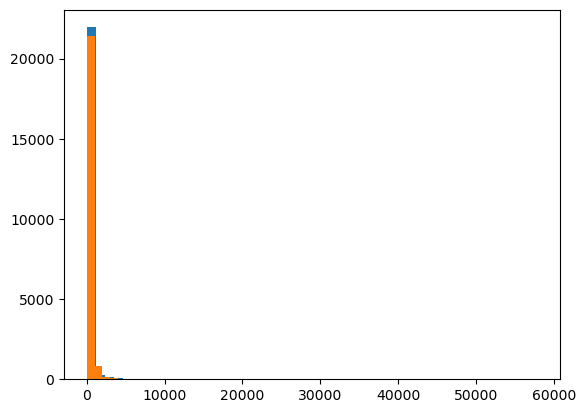

In [233]:
original_cost_rf_pred = cost_rf_model.predict(original_cost_x)

print(mean_squared_error(original_cost_y, original_cost_rf_pred))
print(calculate_normalized_gini_regression(original_cost_y, original_cost_rf_pred))
print(original_cost_y.max(), original_cost_rf_pred.max())
print(original_cost_y.min(), original_cost_rf_pred.min())
print(np.median(original_cost_y), np.median(original_cost_rf_pred))
print(original_cost_y.mean(), original_cost_rf_pred.mean())

plt.hist(original_cost_y, bins=50)
plt.hist(original_cost_rf_pred, bins=50)
plt.show()

In [193]:
all_combos = []

for n_estimators in [5, 10, 15, 20, 25, 50, 100, 200, 300]:
    for min_samples_leaf in [5, 10, 15, 20, 25, 50]:
        for max_depth in [3, 4, 5, 6, 7, 8, 9, 10, 15, 20]:
            for min_samples_split in [2, 3, 4, 5, 10, 15]:
                for learning_rate in [0.01, 0.1, 0.2]:
                    for loss in ['squared_error', 'absolute_error', 'huber', 'quantile']:
                        all_combos.append((n_estimators, min_samples_leaf, max_depth, min_samples_split, learning_rate, loss))

percentage_to_try = 0.0025
n_runs = int(percentage_to_try * len(all_combos))
combos_to_try = random.sample(all_combos, n_runs)
print(f'Num runs: {n_runs}')

best_test_mse, cost_gb_model = np.inf, None

for n_estimators, min_samples_leaf, max_depth, min_samples_split, learning_rate, loss in combos_to_try:
    curr_model = GradientBoostingRegressor(n_estimators=n_estimators, min_samples_leaf=min_samples_leaf, max_depth=max_depth, min_samples_split=min_samples_split, learning_rate=learning_rate, loss=loss)
    curr_model.fit(cost_x_train, cost_y_train)

    cost_y_train_pred = curr_model.predict(cost_x_train)
    cost_y_test_pred = curr_model.predict(cost_x_test)

    train_mse = mean_squared_error(cost_y_train, cost_y_train_pred)
    test_mse = mean_squared_error(cost_y_test, cost_y_test_pred)

    if test_mse < best_test_mse:
        best_test_mse, cost_gb_model = test_mse, curr_model
        print(f'Best results so far: train = {train_mse}, test = {test_mse}')

        # Early stopping
        if best_test_mse == 0.0:
            break

    n_runs -= 1
    print(f'Remaining runs: {n_runs}')

print(best_test_mse)
print(cost_gb_model.get_params())

Num runs: 194
Best results so far: train = 2497149.1943993284, test = 2851173.5004843245
Remaining runs: 193
Remaining runs: 192
Best results so far: train = 348643.9398834553, test = 431811.08304816735
Remaining runs: 191
Remaining runs: 190
Remaining runs: 189
Remaining runs: 188
Best results so far: train = 184088.66937025983, test = 258690.0750533036
Remaining runs: 187
Best results so far: train = 654.136692675172, test = 11153.912218999929
Remaining runs: 186
Remaining runs: 185
Remaining runs: 184
Remaining runs: 183
Remaining runs: 182
Remaining runs: 181
Remaining runs: 180
Remaining runs: 179
Remaining runs: 178
Remaining runs: 177
Remaining runs: 176
Remaining runs: 175
Remaining runs: 174
Remaining runs: 173
Remaining runs: 172
Remaining runs: 171
Remaining runs: 170
Remaining runs: 169
Remaining runs: 168
Remaining runs: 167
Remaining runs: 166
Remaining runs: 165
Remaining runs: 164
Remaining runs: 163
Remaining runs: 162
Remaining runs: 161
Remaining runs: 160
Remaining 

KeyboardInterrupt: 

5870.798021028221
0.5
57895.58456 57860.79501276612
0.0 -1468.5819008075314
0.0 -1.9167687408209941
163.04808373789712 164.6966241572499


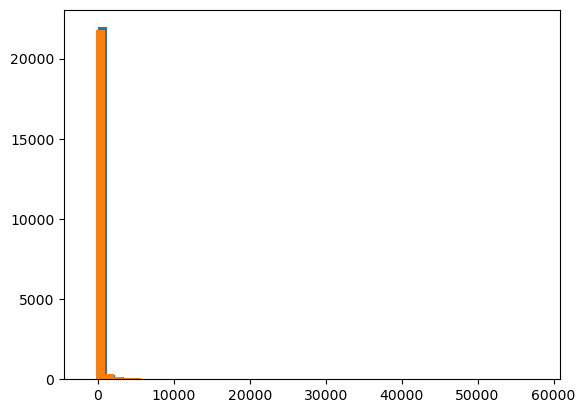

In [234]:
original_cost_gb_pred = cost_gb_model.predict(original_cost_x)

print(mean_squared_error(original_cost_y, original_cost_gb_pred))
print(calculate_normalized_gini_regression(original_cost_y, original_cost_gb_pred))
print(original_cost_y.max(), original_cost_gb_pred.max())
print(original_cost_y.min(), original_cost_gb_pred.min())
print(np.median(original_cost_y), np.median(original_cost_gb_pred))
print(original_cost_y.mean(), original_cost_gb_pred.mean())

plt.hist(original_cost_y, bins=50)
plt.hist(original_cost_gb_pred, bins=50)
plt.show()

In [235]:
cost_model = cost_gb_model

##### Validation predictions

In [249]:
val_df = pd.read_csv('./data/InsNova_data_2023_vh.csv')
ids = val_df['id']
val_df.drop(['id'], axis=1, inplace=True)
val_df.reset_index(drop=True, inplace=True)

val_df.head()

,veh_value,exposure,veh_body,veh_age,gender,area,agecat,engine_type,max_power,driving_history_score,veh_color,marital_status,e_bill,time_of_week_driven,time_driven,trm_len,credit_score,high_education_ind
0,3.40,0.076279,STNWG,2,M,B,4,petrol,174,83,black,S,1,weekday,6pm - 12am,6,648.247594,0
1,2.55,0.093443,STNWG,2,F,A,3,petrol,181,65,yellow,M,0,weekday,12am - 6 am,12,637.752677,0
2,3.04,0.157762,STNWG,2,F,E,4,petrol,136,64,white,S,1,weekday,12pm - 6pm,12,661.483786,0
3,2.05,0.560735,MIBUS,4,M,C,6,dissel,164,82,gray,M,1,weekday,6am - 12pm,12,647.846365,0
4,1.93,0.258275,HBACK,2,M,C,4,dissel,89,48,black,S,0,weekday,6am - 12pm,12,640.257550,0


In [250]:
val_df_dummies = pd.get_dummies(val_df, columns=['veh_body', 'veh_age', 'gender', 'area', 'agecat', 'engine_type', 'veh_color', 'marital_status', 'e_bill', 'time_of_week_driven', 'time_driven', 'trm_len', 'high_education_ind'])
val_df_dummies = val_df_dummies.rename(columns={'high_education_ind_0': 'high_education_ind_0.0', 'high_education_ind_1': 'high_education_ind_1.0'})

In [251]:
val_df_dummies['clm'] = clm_model.predict(val_df_dummies)
val_df_dummies['clm'].value_counts()

0    22520
1      100
Name: clm, dtype: int64

In [252]:
val_df_dummies['numclaims'] = num_claims_model.predict(val_df_dummies)
val_df_dummies['numclaims'].value_counts()

0    22425
1      171
2       24
Name: numclaims, dtype: int64

-2232.4757033791993
7595.848269865623
-5.971073015983707
17.555896192297272


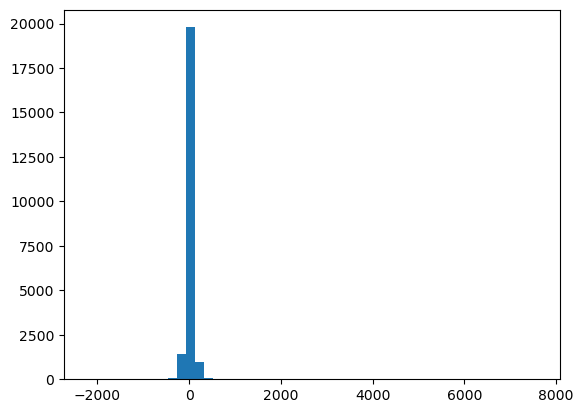

In [254]:
predicted_costs = cost_model.predict(val_df_dummies)

print(predicted_costs.min())
print(predicted_costs.max())
print(np.median(predicted_costs))
print(predicted_costs.mean())

plt.hist(predicted_costs, bins=50)
plt.show()

In [258]:
submission_df = pd.DataFrame({'id': ids, 'Predict': predicted_costs})
submission_df.head()

,id,Predict
0,1,-8.006779
1,2,48.543575
2,3,-18.078890
3,4,1.613493
4,5,12.377424


In [259]:
submission_df.to_csv('./data/submission.csv', index=False)